In [9]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016


ticker='DEXJPUS'
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)

data=web.DataReader(ticker,"fred",start,end)['Adj Close']   

#y=data.resample('MS').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=selectParameters(ticker,y,steps=2,disp=True)
#['8CO.AX', 0, 0, 0, 0, 0, 0, 12, 't', -7.909122119923726, 0.03528654153968552]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]
#data=data['2019-04-01':]

KeyError: 'Adj Close'

In [2]:
y=data.resample('W').mean()
steps=1
#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=steps,disp=False)

['PPK.AX', 0, 0, 0, 1, 0, 1, 12, 'c', -135.65339878663067, 0.10426478973465247]


In [3]:
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error


train_y, test_y = y[:-steps], y[-steps:]

p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
print(p1,p2,t)
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))



[0, 0, 0] [1, 0, 1, 12] c


Date
2017-01-22    0.197386
2017-01-29    0.197386
2017-02-05    0.197386
2017-02-12    0.197386
2017-02-19    0.197386
2017-02-26    0.197386
2017-03-05    0.197386
2017-03-12    0.197386
2017-03-19    0.197386
2017-03-26    0.197386
2017-04-02    0.197386
2017-04-09    0.197386
2017-04-16    0.197386
2017-04-23    0.197386
2017-04-30    0.197386
2017-05-07    0.197386
2017-05-14    0.197386
2017-05-21    0.197386
2017-05-28    0.197386
2017-06-04    0.197386
2017-06-11    0.197386
2017-06-18    0.197386
2017-06-25    0.197386
2017-07-02    0.197386
2017-07-09    0.197386
2017-07-16    0.197386
2017-07-23    0.197386
2017-07-30    0.197386
2017-08-06    0.197386
2017-08-13    0.197386
                ...   
2018-10-28    0.305948
2018-11-04    0.311869
2018-11-11    0.315817
2018-11-18    0.460895
2018-11-25    0.489516
2018-12-02    0.716510
2018-12-09    0.737235
2018-12-16    0.685915
2018-12-23    0.506294
2018-12-30    0.490174
2019-01-06    0.609428
2019-01-13    0.579327
2019-0

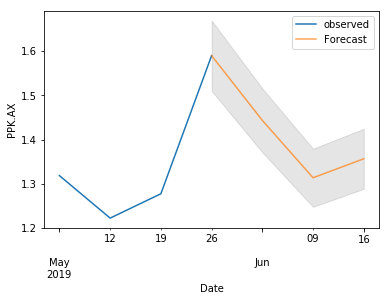

In [4]:
print(train_y)
print(test_y)
print(forcast) 
if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=3,disp=True,days=20)
else:
    print("wrong parameters",len(parameters))

In [5]:
result

2019-05-26    1.590000
2019-06-02    1.443786
2019-06-09    1.314151
2019-06-16    1.357069
dtype: float64